In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("house_rental_data.csv (1).txt")

In [3]:
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
data.shape

(645, 7)

In [6]:
data.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [8]:
data.drop(["Floor","Price"],axis=1,inplace=True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x=data.iloc[:,:].values

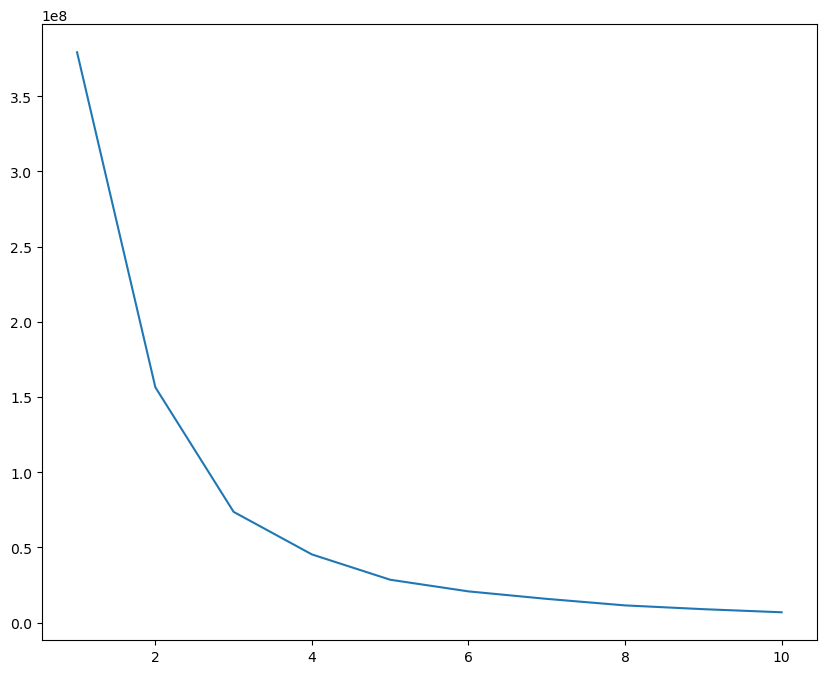

In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss)
    

In [12]:
kmean=KMeans(n_clusters=3,init="k-means++",random_state=42)
pred=kmean.fit_predict(x)
pred

array([1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0,
       1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2,
       0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2,
       2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2,

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(x,pred)

0.5774612518195751

In [14]:
data["Category"]=pred

In [15]:
data.head()

,Sqft,TotalFloor,Bedroom,Living.Room,Bathroom,Category
0,1177.698,7,2,2,2,1
1,2134.800,7,4,2,2,2
2,1138.560,7,2,2,1,1
3,1458.780,7,3,2,2,2
4,967.776,14,3,2,2,1


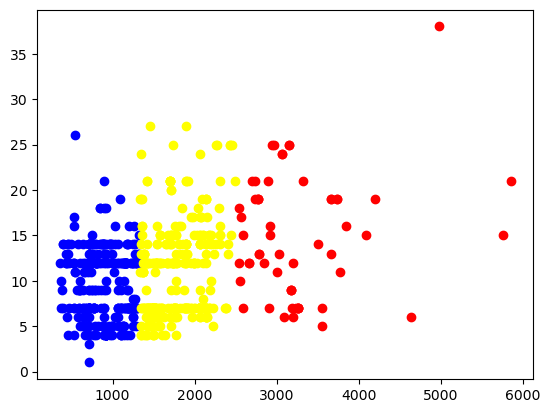

In [16]:
plt.scatter(data[pred==0]["Sqft"],data[pred==0]["TotalFloor"],c="red")
plt.scatter(data[pred==1]["Sqft"],data[pred==1]["TotalFloor"],c="blue")
plt.scatter(data[pred==2]["Sqft"],data[pred==2]["TotalFloor"],c="yellow")